# Présentation de la partie 1 de la SAE sur les graphes

Dans cette première partie de SAE sur les graphes, l'objectif est de pouvoir faire de la coloration de graphe, en utilisant l'algorithme de Welsh et Powell. La coloration de graphes sera utilisée pour établir un planning d'activités, pour plusieurs groupes de personnes, à partir des choix d'activités de chacun des groupes.

La représentation choisie pour les graphes est une matrice d'adjacence, qui sera représentée par un tableau de tableau (les noms des sommets sont des entiers et seront numérotés en commençant à 0). Nous considérons que le nombre de sommets du graphe ne pourra pas être modifié une fois le graphe construit. Un tableau contenant le nom associé à chaque sommet sera également créé.


### Présentation du problème et choix des activités

L'office de tourisme de votre département organise des semaines d'activités en petits groupes. Chaque groupe peut choisir 3 activités. Chaque activité ne peut avoir lieu qu'une seule journée chaque semaine et tous les groupes inscrits à cette activité y participe ce jour-là. On souhaite minimiser le nombre total de journées dans la semaine pour pouvoir faire toutes les activités.

Le premier onglet du document partagé https://uncloud.univ-nantes.fr/index.php/s/C7GToT824Me3FFJ donne les choix d'activités de chaque groupe. Chaque binôme doit ensuite choisir les 7 activités qu'il souhaite considérer et les indiquer dans l'onglet correspondant du document partagé (chaque binôme doit choisir parmi les activités du département assigné à son groupe).



## Installation de graphviz pour pouvoir visualiser les graphes


In [22]:
!pip install graphviz
import graphviz
graphviz.__version__, graphviz.version()

You should consider upgrading via the 'C:\Users\flori\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


('0.19.1', (2, 50, 0))



## Création d'une fonction de conversion d'un graphe, défini par une matrice d'adjacence, vers le format graphviz


In [23]:
def creation_graphe_graphviz(g):
    # création d'un graphe non orienté
    dot = graphviz.Graph()
    
    # ajout des sommets
    for i in range(len(g)):
        dot.node(str(i))
    
    # ajout des arcs
    for i in range(len(g)):
        for j in range(i):
            if g[i][j] == 1:
                dot.edge(str(i), str(j))
    
    return dot

## Création du graphe non orienté correspondant au problème


#### Création du graphe, au format tableau de tableau, et du tableau des noms de sommets


In [24]:
graphe = [[0,1,0,0,0,1,0],
          [1,0,0,0,1,1,0],
          [0,0,0,1,0,0,1],
          [0,0,1,0,1,0,1],
          [0,1,0,1,0,1,1],
          [1,1,0,0,1,0,0],
          [0,0,1,1,1,0,0]]
noms_sommets = ["aquagym","mini-golf","bowling","paintball","aquabulle","canoë kayak","city stade"]


#### Création et affichage du graphe associé, au format graphviz


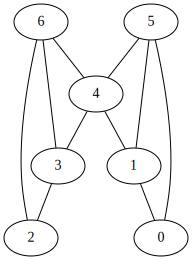

In [25]:
gdot = creation_graphe_graphviz(graphe)
#print(gdot.source)
gdot

## Fonctions utiles pour manipuler les graphes

#### Fonction qui construit un graphe vide (sans aretes), avec le nombre de sommets donné, et qui retourne la matrice d'adjacence correspondante

In [26]:
def graphe_vide(n):
    g = []
    for i in range(n):
        l = []
        for j in range(n):
            l.append(0)
        g.append(l)
    return g

#### Fonction qui retourne vrai si l'arete, dont les numéros de sommets extrémités sont donnés, existe

In [27]:
def est_arete(g, i, j):
    return g[i][j]

#### Fonction qui calcule le degré d'un sommet

In [28]:
def degre(g, s):
    res = 0
    for i in range(len(g)):
        if g[s][i] == 1:
            res+=1
        if g[i][s] == 1:
            res+=1
    return res

In [29]:
def degres_totaux(g):
    res = 0
    tabRes = []
    for i in range(len(g)):
        res=degre(g,i)
        tabRes.append(res/2.)
        
    return tabRes



## Fonction qui donne la coloration des sommets d'un graphe, en utilisant l'algorithme de Welsh-Powell, sous la forme d'une liste.


#### Fonction qui trie les sommets selon leur degré décroissant et qui retourne la liste des sommets ainsi triée:-1

In [30]:
def tri_sommets(g):
    sommets = []
    for i in range(len(g)):
        sommets.append(i)
    degre = degres_totaux(g)
    
    for i in range(1, len(degre)):
        key = degre[i]
        key2 = sommets[i]
        j = i-1
        while j >= 0 and key > degre[j] :
                degre[j + 1] = degre[j]
                sommets[j+1] = sommets[j]
                j -= 1
        degre[j + 1] = key
        sommets[j + 1] = key2
        
            
    sommets_tries = sommets
    return sommets_tries, degre

In [31]:
# test de la fonction tri_sommets
print("tri des sommets du graphe 1, selon leur degré décroissant")
print(tri_sommets(graphe))

tri des sommets du graphe 1, selon leur degré décroissant
([4, 1, 3, 5, 6, 0, 2], [4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0])


#### Fonction qui fait la coloration de sommets avec l'algorithme de Welsh-Powell

In [32]:
def coloration_sommets_welsh_powell(g):
    couleurs = [-1] * len(g)
    actual_color = 0
    while -1 in couleurs:
        for z in sorted([(i,y) for i, y in enumerate(g)], key=lambda x: sum(x[1]), reverse=True):
            i = z[0]
            couleur_adjacent = [couleurs[i] for i, x in enumerate(g[i]) if x == 1]
            if couleurs[i] == -1 and actual_color not in couleur_adjacent:
                couleurs[i] = actual_color
        actual_color += 1
    return couleurs

In [33]:
# test de la fonction coloration_sommets_welsh_powell
print("coloration des sommets du graphe")
couleurs_sommets = coloration_sommets_welsh_powell(graphe)
print(couleurs_sommets)

coloration des sommets du graphe
[0, 1, 0, 1, 0, 2, 2]


#### Fonction qui affiche un planning des activités par journée, à partir de la coloration calculée (en indiquant les noms des activités), en utilisant un dictionnaire

In [34]:
def planning_activites(couleurs, sommets):
    planning = {"jour1": [],"jour2": [],"jour3": []}
    for i in range(len(couleurs)):
        if couleurs[i] == 0:
            planning["jour1"].append(sommets[i])
        if couleurs[i] == 1:
            planning["jour2"].append(sommets[i])
        if couleurs[i] == 2:
            planning["jour3"].append(sommets[i])

    return planning

In [35]:
# test de la fonction planning_activites
print("planning des activités")
planning = planning_activites(couleurs_sommets, noms_sommets)
print(planning)

planning des activités
{'jour1': ['aquagym', 'bowling', 'aquabulle'], 'jour2': ['mini-golf', 'paintball'], 'jour3': ['canoë kayak', 'city stade']}
